In [1]:
# This block contains all necessary user input, including:
#   fits filename
#   star coordinates
#   exposure time
#   zero point magnitude

from astropy.io import fits

# enter the name of your fits file here: fits.open('your_filename.fits')
data = fits.open('ngc1261.fits')
image_data = data[0].data

# enter the pixel coordinates (x,y) of the stars you wish to measure
# you may add any number of stars to this list
positions = [(2560.41, 5336.87), (2553.98, 5393.13), (2437.44, 5387.1)]

# enter exposure time
extime = 1800

# enter ZeroPoint
ZeroPoint = 25.936

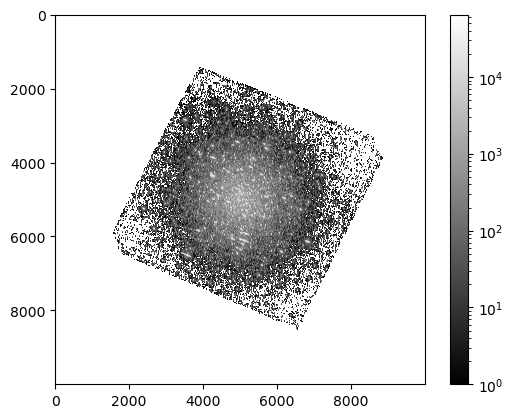

In [2]:
# This block will display your fits image, ensuring that the data was loaded correctly

# import visual tools
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from matplotlib.colors import LogNorm

# plot the image
plt.figure()
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.colorbar()
plt.show()

In [3]:
# this block defines the aperture, annulus, and background values

# import tools
from photutils.aperture import CircularAnnulus, CircularAperture
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry

# define aperture and annulus
aperture = CircularAperture(positions, r=5)
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)

aperstats = ApertureStats(image_data, annulus_aperture)
bkg_mean = aperstats.mean
aperture_area = aperture.area_overlap(image_data)
total_bkg = bkg_mean*aperture_area
star_data = aperture_photometry(image_data, aperture)

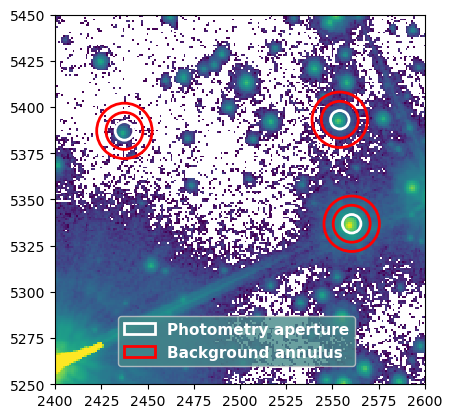

In [4]:
# this block generates a visualization of the aperture and annulus

from astropy.visualization import simple_norm
norm = simple_norm(image_data, 'sqrt', percent=99)
plt.imshow(image_data, norm=LogNorm(), interpolation='nearest')

# set limits of plot
plt.xlim(2400, 2600)
plt.ylim(5250, 5450)

# plot the image
ap_patches = aperture.plot(color='white', lw=2,
    label='Photometry aperture')
ann_patches = annulus_aperture.plot(color='red', lw=2,
    label='Background annulus')
handles = (ap_patches[0], ann_patches[0])
plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white',
    handles=handles, prop={'weight': 'bold', 'size': 11})

In [7]:
# this block calculates the magnitude of each star using the extracted data

# extract aperture values from star_data
aperture_values = []
for star in star_data:
    aperture_values.append(star[3])

# subtract background values from aperture
bkg_apt_vals = aperture_values - total_bkg

# calculate values
import math
magnitudes = []
for val in bkg_apt_vals:
    mag_val = ZeroPoint-2.5*math.log((val/extime),10)
    magnitudes.append(mag_val)

# print data
print(f'Aperture Values: {aperture_values}')
print(f'Total Background: {total_bkg}')
print(f'Aperture - Background: {bkg_apt_vals}')
print(f'Calculated Magnitudes: {magnitudes}')

Aperture Values: [431097.1415783105, 34562.85273332265, 7419.169008529717]
Total Background: [3462.94640594  251.00765731 -160.47702932]
Aperture - Background: [427634.19517237  34311.84507601   7579.64603784]
Calculated Magnitudes: [19.99650019856275, 22.73557108195869, 24.375058950327254]


In [6]:
# this block creates a table that displays our data

# define table variable
phot_table = star_data

# define table columns
phot_table['total_bkg'] = total_bkg
phot_bkgsub = phot_table['aperture_sum']-total_bkg
phot_table['aperture_sum_bkgsub']=phot_bkgsub
phot_table['magnitude'] = magnitudes

# format and print table
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)

 id xcenter ycenter aperture_sum total_bkg  aperture_sum_bkgsub magnitude
      pix     pix                                                        
--- ------- ------- ------------ ---------- ------------------- ---------
  1 2560.41 5336.87    431097.14  3462.9464            427634.2   19.9965
  2 2553.98 5393.13    34562.853  251.00766           34311.845 22.735571
  3 2437.44  5387.1     7419.169 -160.47703            7579.646 24.375059
